In [1]:
from glob import glob
from barplots import barplots
import pandas as pd
import os

In [2]:
paths = glob("nolan/*/Cora/*_performance.csv.xz")

In [3]:
paths = glob("nolan/*/CiteSeer/*_performance.csv.xz")

In [4]:
paths = glob("nolan/*/PubmedDiabetes/*_performance.csv.xz")

In [5]:
dfs = []
for path in paths:
    node_embedding_method_name, graph_name, _ = path.split(os.sep)[1:]
    df = pd.read_csv(path)
    df["graph_name"] = graph_name
    df["node_embedding_method_name"] = node_embedding_method_name
    dfs.append(df)
df = pd.concat(dfs)
df = df[df.run_type == "validation"]

SkipGram 0.8792482250928879 0.004571070907483765


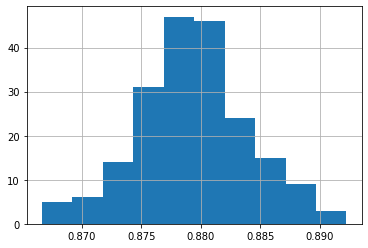

GloVe 0.877573528289795 0.004748838625924315


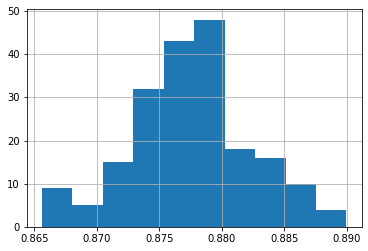

CBOW 0.8803346851468086 0.004710596045851476


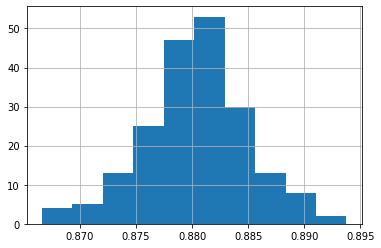

In [6]:
import matplotlib.pyplot as plt

for method in df.node_embedding_method_name.unique():
    series = df[df.node_embedding_method_name==method].accuracy
    print(method, series.mean(), series.std())
    series.hist(bins=10)
    plt.show()

In [7]:
df = pd.read_csv("node_label_performance.csv", index_col=0).reset_index(drop=True)
df = df.drop(columns="holdout_number")

In [8]:
validation = df[df.run_type=="validation"]
validation = validation.drop(columns=["run_type"])
for index, metrics in validation.groupby(["graph_name", "node_embedding_method_name"]):
    print(index, metrics["accuracy"].agg(["mean", "std"]))

('CiteSeer', 'CBOW') mean    0.767992
std     0.013974
Name: accuracy, dtype: float64
('CiteSeer', 'GloVe') mean    0.766412
std     0.014681
Name: accuracy, dtype: float64
('CiteSeer', 'SkipGram') mean    0.767855
std     0.014512
Name: accuracy, dtype: float64
('Cora', 'CBOW') mean    0.878064
std     0.012520
Name: accuracy, dtype: float64
('Cora', 'GloVe') mean    0.875899
std     0.012332
Name: accuracy, dtype: float64
('Cora', 'SkipGram') mean    0.878073
std     0.012555
Name: accuracy, dtype: float64
('PubMedDiabetes', 'CBOW') mean    0.880335
std     0.004711
Name: accuracy, dtype: float64
('PubMedDiabetes', 'GloVe') mean    0.877574
std     0.004749
Name: accuracy, dtype: float64
('PubMedDiabetes', 'SkipGram') mean    0.879248
std     0.004571
Name: accuracy, dtype: float64


In [9]:
others = pd.DataFrame({
    ("PubMedDiabetes", "Planetoid"): [0.7720, 0], # NOT PROVIDED STD
    ("PubMedDiabetes", "APPNP (PyTorch Geometric)"): [0.7940, 0.022],
    ("PubMedDiabetes", "APPNP (Pagerank GNN)"): [0.7973, 0.0031],
    ("PubMedDiabetes", "ChebNet"): [0.7440, 0], # NOT PROVIDED STD
    ("PubMedDiabetes", "Graph U-Nets"): [0.7960, 0.002],
    ("PubMedDiabetes", "LGCN"): [0.7950, 0.002],
    ("PubMedDiabetes", "SplineCNN"): [0.8888, 0], # NOT PROVIDED STD
    ("Cora", "Planetoid"): [0.7570, 0], # NOT PROVIDED STD
    ("Cora", "APPNP (PyTorch Geometric)"): [0.8220, 0.015],
    ("Cora", "APPNP (Pagerank GNN)"): [0.8509, 0.0025],
    ("Cora", "ChebNet"): [0.8120, 0], # NOT PROVIDED STD
    ("Cora", "Graph U-Nets"): [0.8440, 0.006],
    ("Cora", "LGCN"): [0.8330, 0.005],
    ("Cora", "SplineCNN"): [0.8948, 0.0031],
    ("CiteSeer", "Planetoid"): [0.6470, 0], # NOT PROVIDED STD
    ("CiteSeer", "APPNP (PyTorch Geometric)"): [0.7000, 0.014],
    ("CiteSeer", "APPNP (Pagerank GNN)"): [0.7573, 0.0030],
    ("CiteSeer", "ChebNet"): [0.6980, 0], # NOT PROVIDED STD
    ("CiteSeer", "Graph U-Nets"): [0.7320, 0.005],
    ("CiteSeer", "LGCN"): [0.7300, 0.005],
    ("CiteSeer", "SplineCNN"): [0.7920, 0], # NOT PROVIDED STD
}).T
others.columns = pd.MultiIndex.from_tuples([("accuracy", "mean"), ("accuracy", "std")])
others

accuracy        
                                             mean     std
PubMedDiabetes Planetoid                   0.7720  0.0000
               APPNP (PyTorch Geometric)   0.7940  0.0220
               APPNP (Pagerank GNN)        0.7973  0.0031
               ChebNet                     0.7440  0.0000
               Graph U-Nets                0.7960  0.0020
               LGCN                        0.7950  0.0020
               SplineCNN                   0.8888  0.0000
Cora           Planetoid                   0.7570  0.0000
               APPNP (PyTorch Geometric)   0.8220  0.0150
               APPNP (Pagerank GNN)        0.8509  0.0025
               ChebNet                     0.8120  0.0000
               Graph U-Nets                0.8440  0.0060
               LGCN                        0.8330  0.0050
               SplineCNN                   0.8948  0.0031
CiteSeer       Planetoid                   0.6470  0.0000
               APPNP (PyTorch Geometric)   0.7000  0.0140
               APPNP (Pagerank GNN)        0.7573  0.0030
               ChebNet                     0.6980  0.0000
               Graph U-Nets                0.7320  0.0050
               LGCN                        0.7300  0.0050
               SplineCNN                   0.7920  0.0000

In [10]:
ours = validation.groupby(by=["graph_name", "node_embedding_method_name"]).agg(["mean", "std"])
ours["library"] = "GraPE"
others["library"] = "Other"
others = pd.concat([
    ours,
    others,
]).dropna(axis=1).reset_index()
others = others[others.library=="Other"]
others = others.set_index(["graph_name", "node_embedding_method_name"])

In [11]:
data = pd.concat([
    others,
    ours,
]).dropna(axis=1).reset_index()

In [12]:
data

graph_name node_embedding_method_name  accuracy           library
                                                   mean       std        
0   PubMedDiabetes                  Planetoid  0.772000  0.000000   Other
1   PubMedDiabetes  APPNP (PyTorch Geometric)  0.794000  0.022000   Other
2   PubMedDiabetes       APPNP (Pagerank GNN)  0.797300  0.003100   Other
3   PubMedDiabetes                    ChebNet  0.744000  0.000000   Other
4   PubMedDiabetes               Graph U-Nets  0.796000  0.002000   Other
5   PubMedDiabetes                       LGCN  0.795000  0.002000   Other
6   PubMedDiabetes                  SplineCNN  0.888800  0.000000   Other
7             Cora                  Planetoid  0.757000  0.000000   Other
8             Cora  APPNP (PyTorch Geometric)  0.822000  0.015000   Other
9             Cora       APPNP (Pagerank GNN)  0.850900  0.002500   Other
10            Cora                    ChebNet  0.812000  0.000000   Other
11            Cora               Graph U-Nets  0.844000  0.006000   Other
12            Cora                       LGCN  0.833000  0.005000   Other
13            Cora                  SplineCNN  0.894800  0.003100   Other
14        CiteSeer                  Planetoid  0.647000  0.000000   Other
15        CiteSeer  APPNP (PyTorch Geometric)  0.700000  0.014000   Other
16        CiteSeer       APPNP (Pagerank GNN)  0.757300  0.003000   Other
17        CiteSeer                    ChebNet  0.698000  0.000000   Other
18        CiteSeer               Graph U-Nets  0.732000  0.005000   Other
19        CiteSeer                       LGCN  0.730000  0.005000   Other
20        CiteSeer                  SplineCNN  0.792000  0.000000   Other
21        CiteSeer                       CBOW  0.767992  0.013974   GraPE
22        CiteSeer                      GloVe  0.766412  0.014681   GraPE
23        CiteSeer                   SkipGram  0.767855  0.014512   GraPE
24            Cora                       CBOW  0.878064  0.012520   GraPE
25            Cora                      GloVe  0.875899  0.012332   GraPE
26            Cora                   SkipGram  0.878073  0.012555   GraPE
27  PubMedDiabetes                       CBOW  0.880335  0.004711   GraPE
28  PubMedDiabetes                      GloVe  0.877574  0.004749   GraPE
29  PubMedDiabetes                   SkipGram  0.879248  0.004571   GraPE

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Rendering barplots:   0%|          | 0/1 [00:00<?, ?it/s]

((<Figure size 2400x660 with 3 Axes>,),
 (array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6801272d0>,
        dtype=object),))

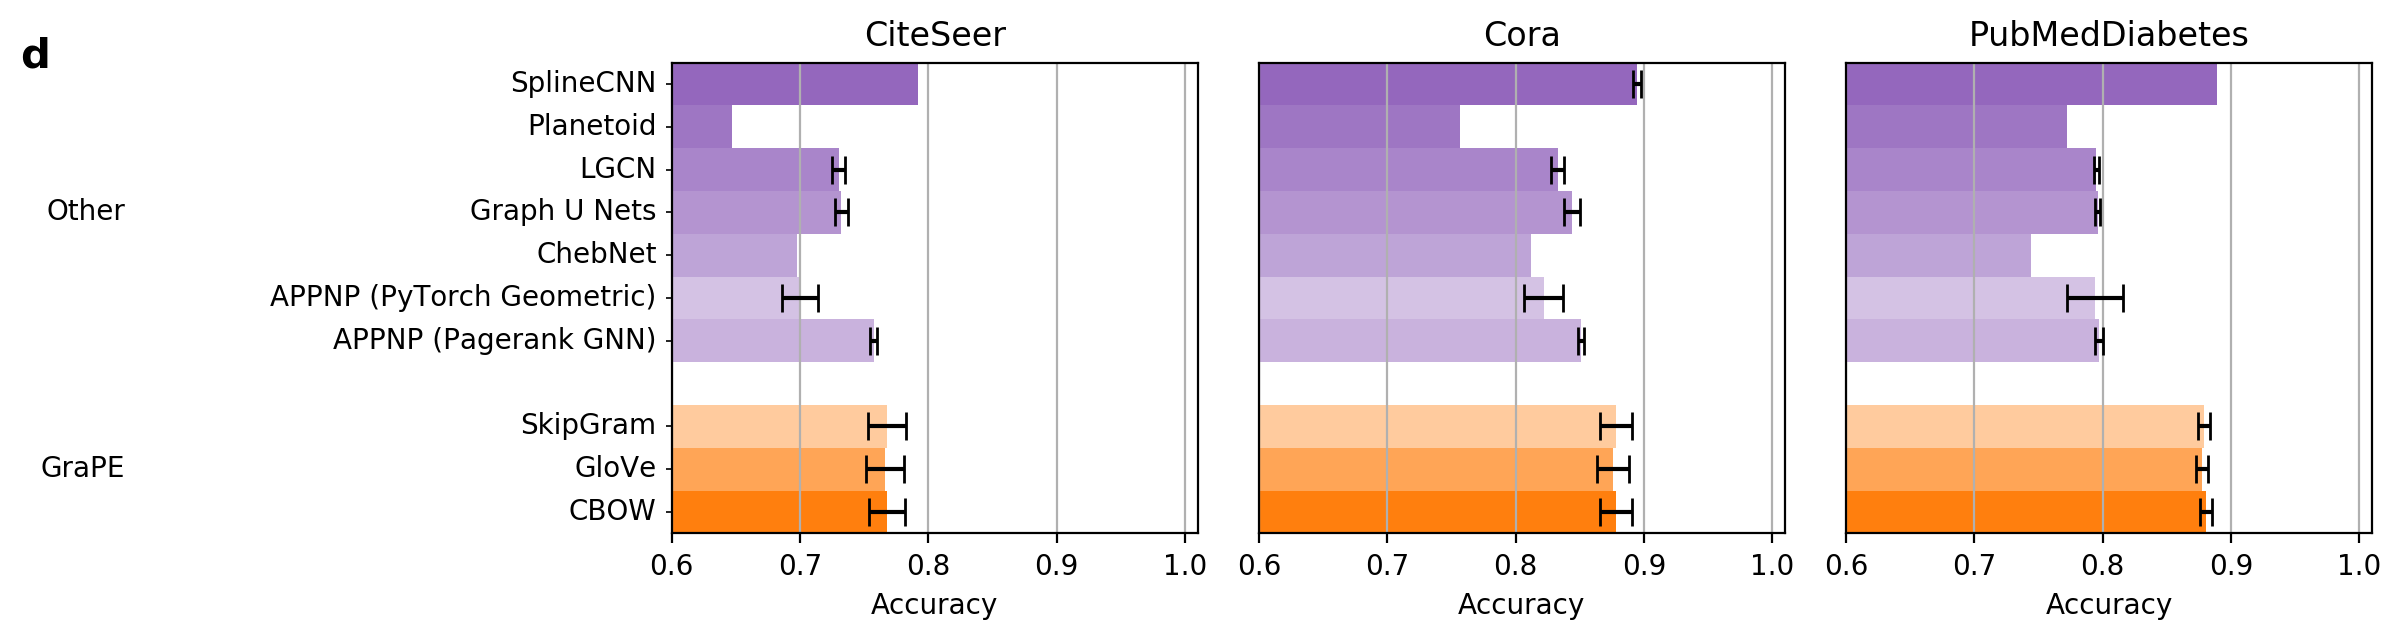

In [13]:
barplots(
    data,
    groupby=["graph_name", "library", "node_embedding_method_name"],
    subplots=True,
    show_legend=False,
    show_standard_deviation=False,
    orientation="horizontal",
    letters={
        "accuracy":"d"
    },
    #data_label="",
    path = 'node_label_prediction_{feature}.png',
    height=4,
    min_value=0.6,
    #show_legend=False,
    colors={
        "CBOW": "tab:orange",
        "SkipGram": "tab:orange",
        "GloVe": "tab:orange",

        "struc2vec": "tab:blue",
        "node2vec": "tab:blue",
        "GAE": "tab:blue",
        "GraRep": "tab:blue",
        "HOPE": "tab:blue",
        "LINE": "tab:blue",
        "SDNE": "tab:blue",

        "APPNP \(PyTorch Geometric\)": "tab:purple",
        "APPNP \(Pagerank GNN\)": "tab:purple",
        "ChebNet": "tab:purple",
        "Graph U-Nets": "tab:purple",
        "LGCN": "tab:purple",
        "Planetoid": "tab:purple",
        "SplineCNN": "tab:purple",
    },
    alphas={
        "CBOW": 1.0,
        "GloVe": 0.7,
        "SkipGram": 0.4,

        "struc2vec": 1.0,
        "node2vec": 0.9,
        "SDNE": 0.8,
        "LINE": 0.7,
        "HOPE": 0.6,
        "GraRep": 0.5,
        "GAE": 0.4,

        "APPNP \(PyTorch Geometric\)": 0.4,
        "APPNP \(Pagerank GNN\)": 0.5,
        "ChebNet": 0.6,
        "Graph U-Nets": 0.7,
        "LGCN": 0.8,
        "Planetoid": 0.9,
        "SplineCNN": 1.0,
    },
    unique_minor_labels=True,
)